In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('aggregated_data_NEW.csv')

In [8]:
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

In [9]:
df.sort_values(by=['CounterID_ASTA', 'StartTime'], ascending=True, inplace=True)

In [12]:
cols_to_use = ['CounterID_ASTA', 'ASTA_Counters.NationalParkCode',
               'precip_intensity', 'precip_type', 'precip_probability', 'temperature',
               'humidity', 'wind_speed', 'wind_gust', 'cloud_cover', 'visibility',
               'is_holiday', 'weekDayNumber', 'is_weekend', 'berry_season',
               'mushroom_season', 'school_season', 'daylight_hours', 'is_lighty', 
               'Korpinkierros: (Finnország)', 'Haukkalampi: (Finnország)',
               'Mustalampi: (Finnország)', 'Högbacka: (Finnország)',
               'Kattila: (Finnország)', 'Siikaniemi: (Finnország)',
               'Hotelli Nuuksio: (Finnország)', 'Holma-Saarijärvi: (Finnország)',
               'Takala: (Finnország)', 'Veikkola: (Finnország)',
               'luonto: (Finnország)', 'nature: (Finnország)',
               'kansallispuisto: (Finnország)', 'walking: (Finnország)',
               'hiking: (Finnország)', 'vaellus: (Finnország)', 'forest: (Finnország)',
               'outdoor: (Finnország)', 'Ylläsjärvi: (Finnország)',
               'Äkäslompolo: (Finnország)', 'Pallas: (Finnország)',
               'Ylläs: (Finnország)',
               'Pallas-Yllästunturi National Park: (Finnország)',
               'post_park_relation',
               'post_content_type', 'post_contains_link']

target = 'Visits'

In [17]:
shiftable_columns=['Korpinkierros: (Finnország)', 'Haukkalampi: (Finnország)',
               'Mustalampi: (Finnország)', 'Högbacka: (Finnország)',
               'Kattila: (Finnország)', 'Siikaniemi: (Finnország)',
               'Hotelli Nuuksio: (Finnország)', 'Holma-Saarijärvi: (Finnország)',
               'Takala: (Finnország)', 'Veikkola: (Finnország)',
               'luonto: (Finnország)', 'nature: (Finnország)',
               'kansallispuisto: (Finnország)', 'walking: (Finnország)',
               'hiking: (Finnország)', 'vaellus: (Finnország)', 'forest: (Finnország)',
               'outdoor: (Finnország)', 'Ylläsjärvi: (Finnország)',
               'Äkäslompolo: (Finnország)', 'Pallas: (Finnország)',
               'Ylläs: (Finnország)',
               'Pallas-Yllästunturi National Park: (Finnország)',
               'post_park_relation',
               'post_content_type', 'post_contains_link']

In [19]:
for col in shiftable_columns:
    df[col+'_yesterday'] = np.nan

In [20]:
shifted = [col+'_yesterday' for col in shiftable_columns]

In [23]:
df[shifted] = df.groupby('CounterID_ASTA')[shiftable_columns].shift(-24)

In [55]:
X = df.copy()
y = df[target].copy()

In [56]:
#post_park_relation
X['post_park_relation'].replace('no_data', -9999, inplace=True)
X['post_park_relation'] = X['post_park_relation'].astype('float')

X['post_contains_link'].replace('N', 0, inplace=True)
X['post_contains_link'].replace('Y', 1, inplace=True)
X['post_contains_link'].replace('no_data', -9999, inplace=True)
X['post_contains_link'] = X['post_contains_link'].astype('int')


#precip_intensity, fillna: 0
X['precip_intensity'].fillna(-9999, inplace=True)

#precip_probability
X['precip_probability'].fillna(-9999, inplace=True)

#precip_type
X['precip_type'].fillna('Nincs', inplace=True)

#temperature
X['temperature'].fillna(method='ffill', inplace=True)

#humidity
X['humidity'].fillna(method='ffill', inplace=True)

#wind_speed
X['wind_speed'].fillna(-9999, inplace=True)

#wind_gust
X['wind_gust'].fillna(-9999, inplace=True)

#cloud_cover
X['cloud_cover'].fillna(-9999, inplace=True)

#visibility
X['visibility'].fillna(-9999, inplace=True)

In [57]:
le = LabelEncoder()
X['precip_type'] = le.fit_transform(X['precip_type'])

le2 = LabelEncoder()
X['post_content_type'] = le2.fit_transform(X['post_content_type'])

In [58]:
X.dropna(axis=0, inplace=True)

In [59]:
le2 = LabelEncoder()
X['post_content_type_yesterday'] = le2.fit_transform(X['post_content_type_yesterday'])

In [60]:
#post_park_relation
X['post_park_relation_yesterday'].replace('no_data', -9999, inplace=True)
X['post_park_relation_yesterday'] = X['post_park_relation_yesterday'].astype('float')

X['post_contains_link_yesterday'].replace('N', 0, inplace=True)
X['post_contains_link_yesterday'].replace('Y', 1, inplace=True)
X['post_contains_link_yesterday'].replace('no_data', -9999, inplace=True)
X['post_contains_link_yesterday'] = X['post_contains_link_yesterday'].astype('int')

In [61]:
X.dropna(axis=0, inplace=True)

In [62]:
X.shape

(356036, 74)

In [63]:
cols_new = ['CounterID_ASTA', 'ASTA_Counters.NationalParkCode',
               'precip_intensity', 'precip_type', 'precip_probability', 'temperature',
               'humidity', 'wind_speed', 'wind_gust', 'cloud_cover', 'visibility',
               'is_holiday', 'weekDayNumber', 'is_weekend', 'berry_season',
               'mushroom_season', 'school_season', 'daylight_hours', 'is_lighty']

In [64]:
cols_new += shifted

In [65]:
X_train = X.iloc[:280000,:].copy()
y_train = y[:280000].copy()
X_test = X.iloc[280000:,:].copy()
y_test = y[280000:].copy()

In [66]:
model = GradientBoostingRegressor(n_estimators=600, random_state=42)

In [67]:
model.fit(X_train[cols_new], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
X_test['true'] = y_test.copy()
X_test['pred'] = model.predict(X_test[cols_new])

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

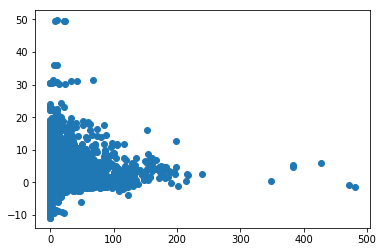

In [70]:
plt.scatter(X_test['true'], X_test['pred'])

In [72]:
X_test['pred'] = X_test['pred'].apply(lambda x: 0 if x<0 else x)

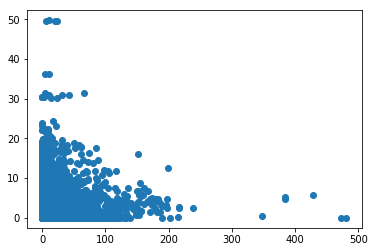

In [73]:
plt.scatter(X_test['true'], X_test['pred'])

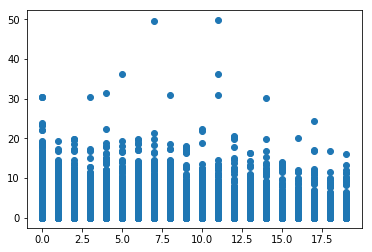

In [75]:
df_filtered = X_test[X_test['true']<20].copy()
plt.scatter(df_filtered['true'], df_filtered['pred'])

In [77]:
df_importance = pd.DataFrame(model.feature_importances_, index=cols_new)

In [80]:
filtered_cols = df_importance.sort_values(by=0, ascending=False).head(5).index.tolist()

In [81]:
new_model = GradientBoostingRegressor(n_estimators=600, random_state=42)

In [82]:
new_model.fit(X_train[filtered_cols], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
X_test['true'] = y_test.copy()
X_test['pred'] = new_model.predict(X_test[filtered_cols])

In [84]:
X_test['pred'] = X_test['pred'].apply(lambda x: 0 if x<0 else x)

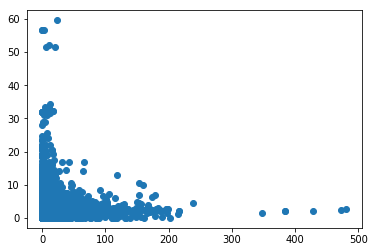

In [85]:
plt.scatter(X_test['true'], X_test['pred'])

In [89]:
last_rows = X_test.iloc[-347:,:].copy()

In [90]:
last_rows.reset_index(drop=True, inplace=True)

In [95]:
cols_to_save = filtered_cols + ['true', 'pred', 'StartTime']

In [96]:
last_rows[cols_to_save].to_csv('RESULT.csv', index=False)